In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import plotly.graph_objects as go

from sklearn.preprocessing import MaxAbsScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading Dataset
df = pd.read_csv('/kaggle/input/global-data-on-sustainable-energy/global-data-on-sustainable-energy (1).csv')
print(df.columns)  # Display a sample of the data

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


In [3]:
# Dynamic world map with a slider
def plot_world_map_with_slider(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        filtered_df = df[df['Year'] == year]
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False
        )
        fig.add_trace(trace)

    fig.data[0].visible = True
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)
        )
        step['args'][0]['visible'][i] = True
        steps.append(step)

    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},
    )]

    fig.update_layout(
        title_text=f'{column_name} Map with slider',
        title_font_size=24,
        title_x=0.5,
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,
        width=1000,
        font=dict(family='Arial', size=12),
        margin=dict(t=80, l=50, r=50, b=50),
    )
    fig.show()

# Example usage
column_name = 'Access to electricity (% of population)'
plot_world_map_with_slider(column_name)
column_name = 'Renewable energy share in the total final energy consumption (%)'
plot_world_map_with_slider(column_name)

In [4]:
# Filtering numerical data
numeric_data = df.select_dtypes(include='number')
# Filtering categorical data
categorical_data = df.select_dtypes(exclude='number')

In [5]:
# Describe dataset and show missing values
df_info = df.describe().transpose()
missing_values = df.isna().sum()

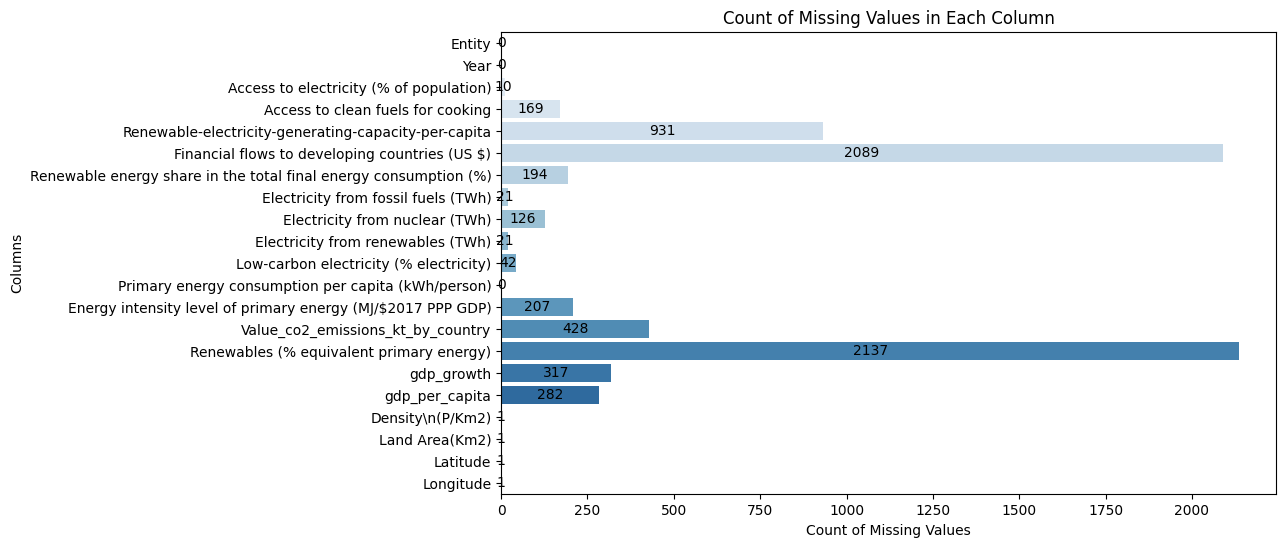

In [6]:
# Create a horizontal bar chart
fig_missing_values = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values.values, y=missing_values.index, palette='Blues')

# Add the value of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height()/2, 
            '{:.0f}'.format(p.get_width()), ha='center', va='center')

# Customize the chart
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns')
# Display the chart
plt.show()

In [7]:
# Drop columns with a high number of missing values
df.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

In [8]:
# Fill missing values with mean
columns_to_fill_mean = ['Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)',
                        'Electricity from nuclear (TWh)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                        'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita']
df[columns_to_fill_mean] = df[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

In [9]:
# Drop remaining rows with missing values
df = df.dropna()

In [10]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


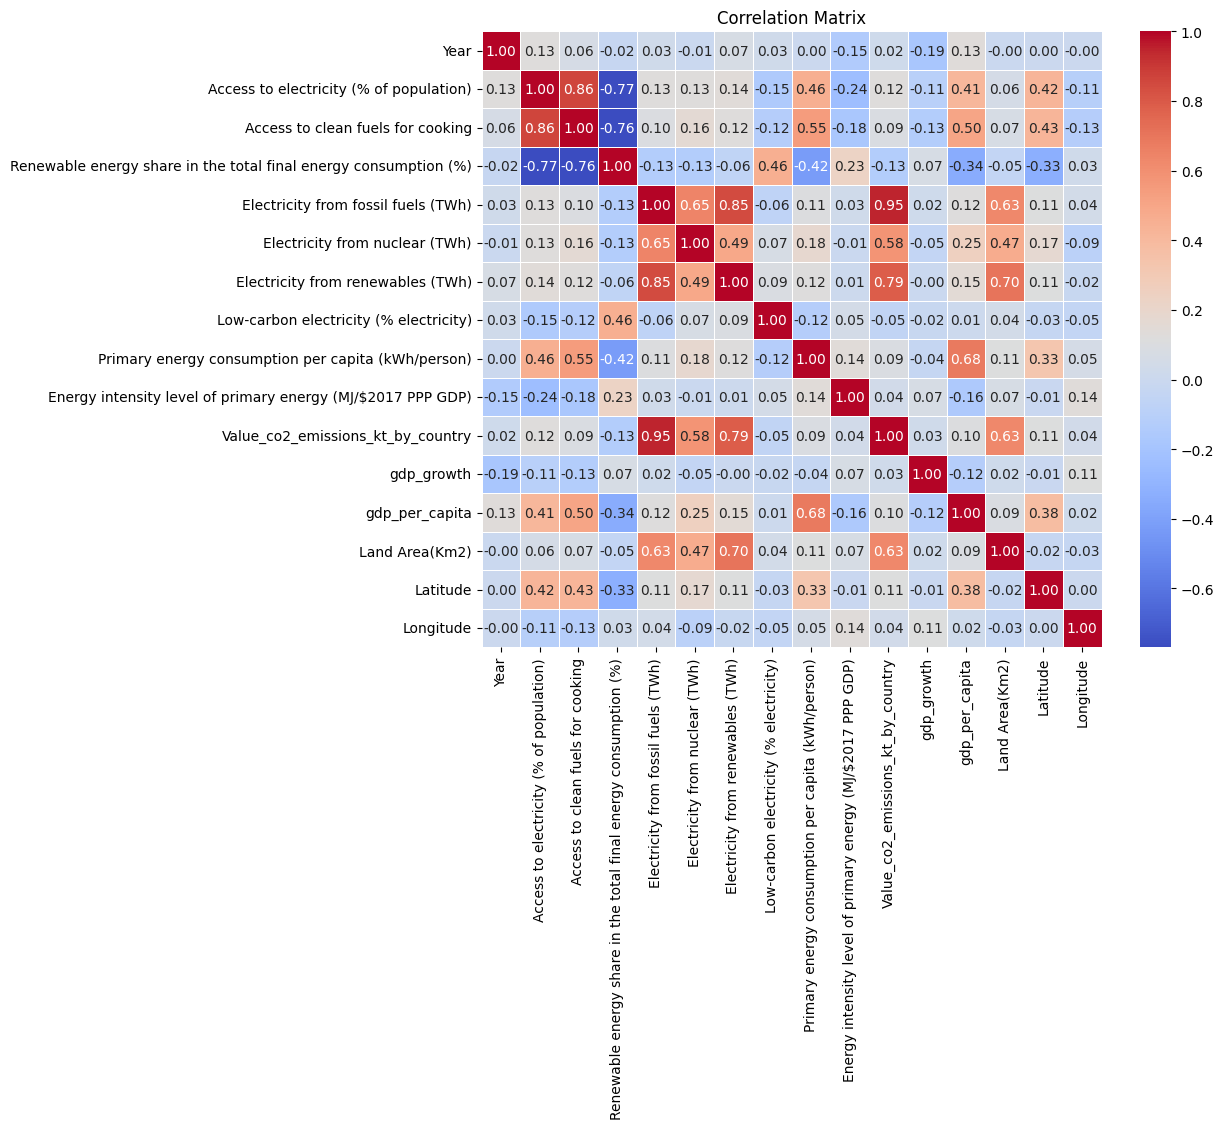

In [11]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap using seaborn
fig_correlation = plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Customize the chart
plt.title('Correlation Matrix')
plt.show()

In [12]:
df.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita                                                      0
Density\n(P/Km2)    

In [13]:
# Temporary suppression of the warning
pd.set_option('mode.chained_assignment', None)

In [14]:
# Rename the 'Density' column
df.rename(columns={'Density\\n(P/Km2)': 'Density'}, inplace=True)
# Convert 'Density' to string and then replace commas and convert to integer using .loc
df.loc[:, 'Density'] = df['Density'].astype(str).str.replace(',', '').astype(int)

In [15]:
print(df.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')


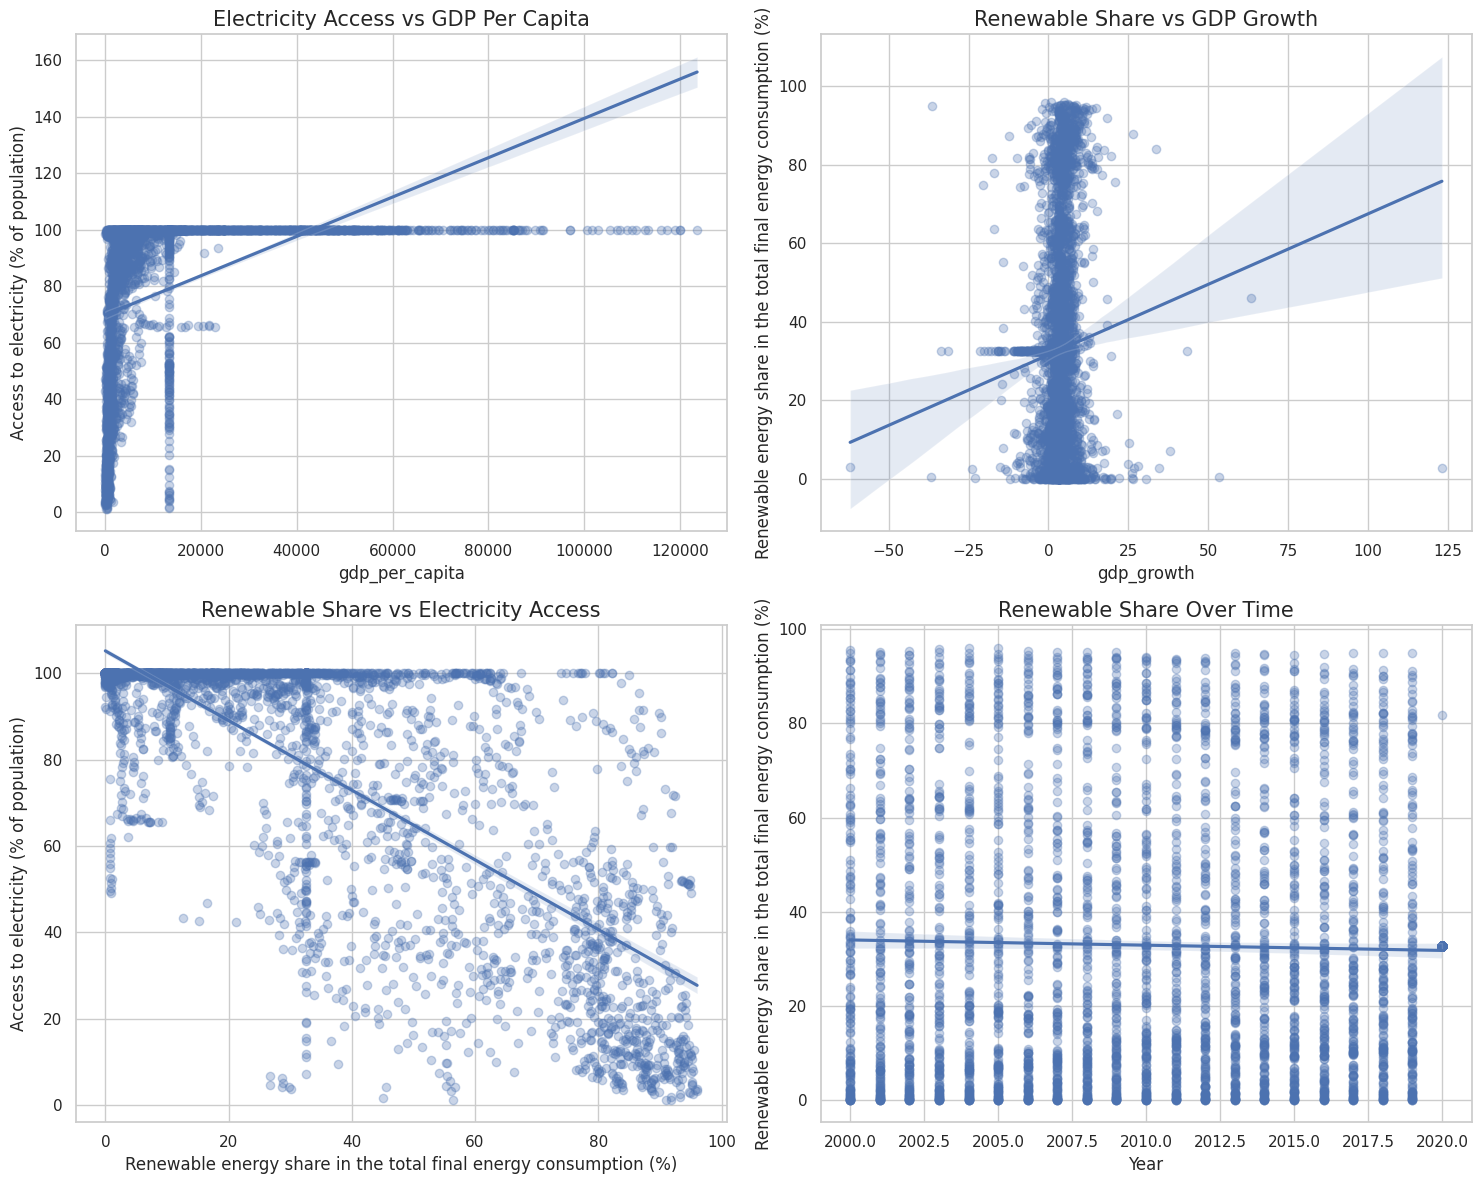

In [16]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Define the columns and titles for the visualizations
columns = [
    ('gdp_per_capita', 'Access to electricity (% of population)', 'Electricity Access vs GDP Per Capita'),
    ('gdp_growth', 'Renewable energy share in the total final energy consumption (%)', 'Renewable Share vs GDP Growth'),
    ('Renewable energy share in the total final energy consumption (%)', 'Access to electricity (% of population)', 'Renewable Share vs Electricity Access'),
    ('Year', 'Renewable energy share in the total final energy consumption (%)', 'Renewable Share Over Time')
]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot the visualizations
for i, (x_col, y_col, title) in enumerate(columns):
    plt.subplot(2, 2, i + 1)  # Use 2 rows and 2 columns

    if 'Year' in title:
        sns.lineplot(x=x_col, y=y_col, data=df, ax=axes[i])
    else:
        sns.regplot(x=x_col, y=y_col, data=df, scatter_kws={'alpha': 0.3}, ax=axes[i])

    plt.title(title, size=15)
    plt.xlabel(x_col)
    plt.ylabel(y_col)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

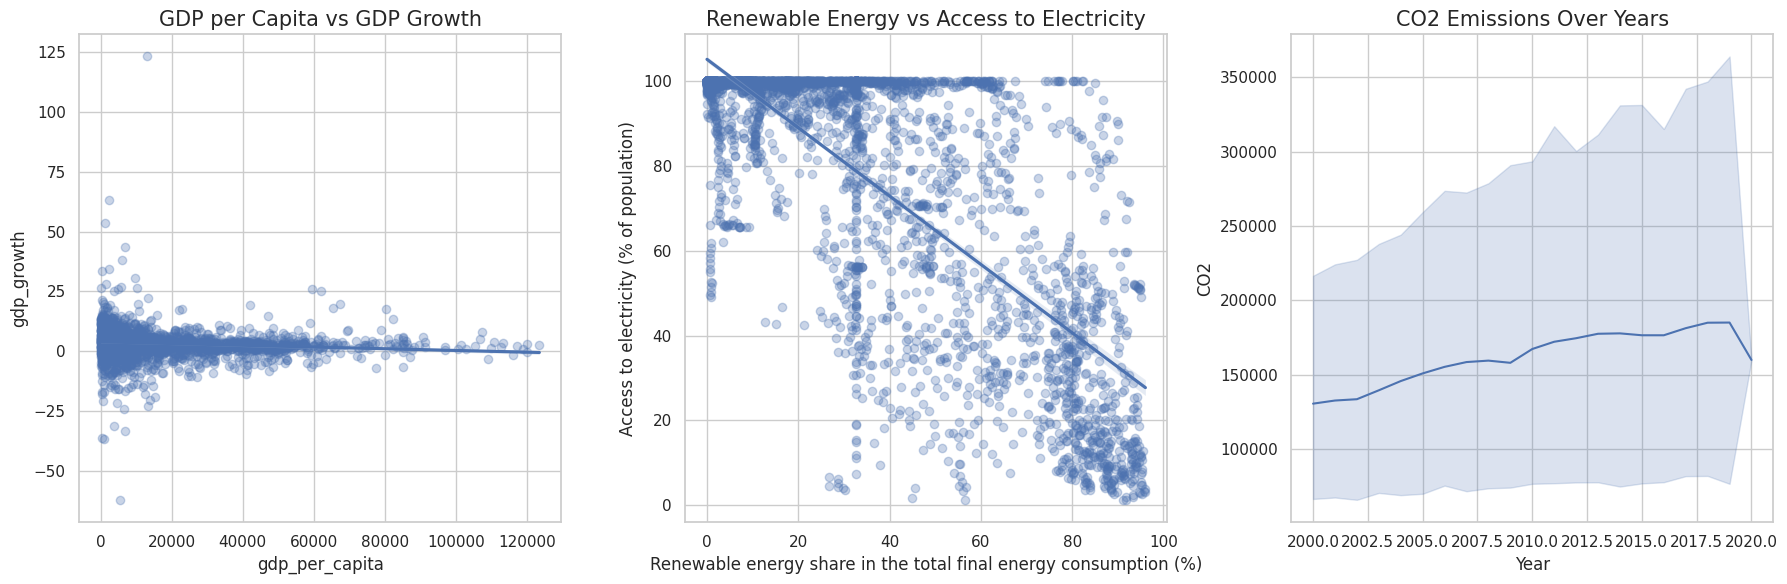

In [17]:
# Create a copy of the DataFrame
df_copy = df.rename(columns={"Value_co2_emissions_kt_by_country": "CO2", 'Land Area(Km2)': 'Land'})
# Select specific columns for visualization
columns_for_visualization = [('gdp_per_capita', 'gdp_growth', 'GDP per Capita vs GDP Growth'),
                              ('Renewable energy share in the total final energy consumption (%)', 'Access to electricity (% of population)', 'Renewable Energy vs Access to Electricity'),
                              ('Year', 'CO2', 'CO2 Emissions Over Years')]
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()
# Titles of the visualizations to be displayed
selected_titles = ['GDP per Capita vs GDP Growth', 'Renewable Energy vs Access to Electricity', 'CO2 Emissions Over Years']
# Iterate through the columns and plot the selected visualizations
for i, (x_col, y_col, title) in enumerate(columns_for_visualization):
    if title not in selected_titles:
        continue
    plt.subplot(1, 3, selected_titles.index(title) + 1)
    if 'Year' in title:
        sns.lineplot(x=x_col, y=y_col, data=df_copy, ax=axes[selected_titles.index(title)])
    else:
        sns.regplot(x=x_col, y=y_col, data=df_copy, scatter_kws={'alpha': 0.3}, ax=axes[selected_titles.index(title)])
    plt.title(title, size=15)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
# Adjust layout for better visualization
plt.tight_layout()
plt.show()

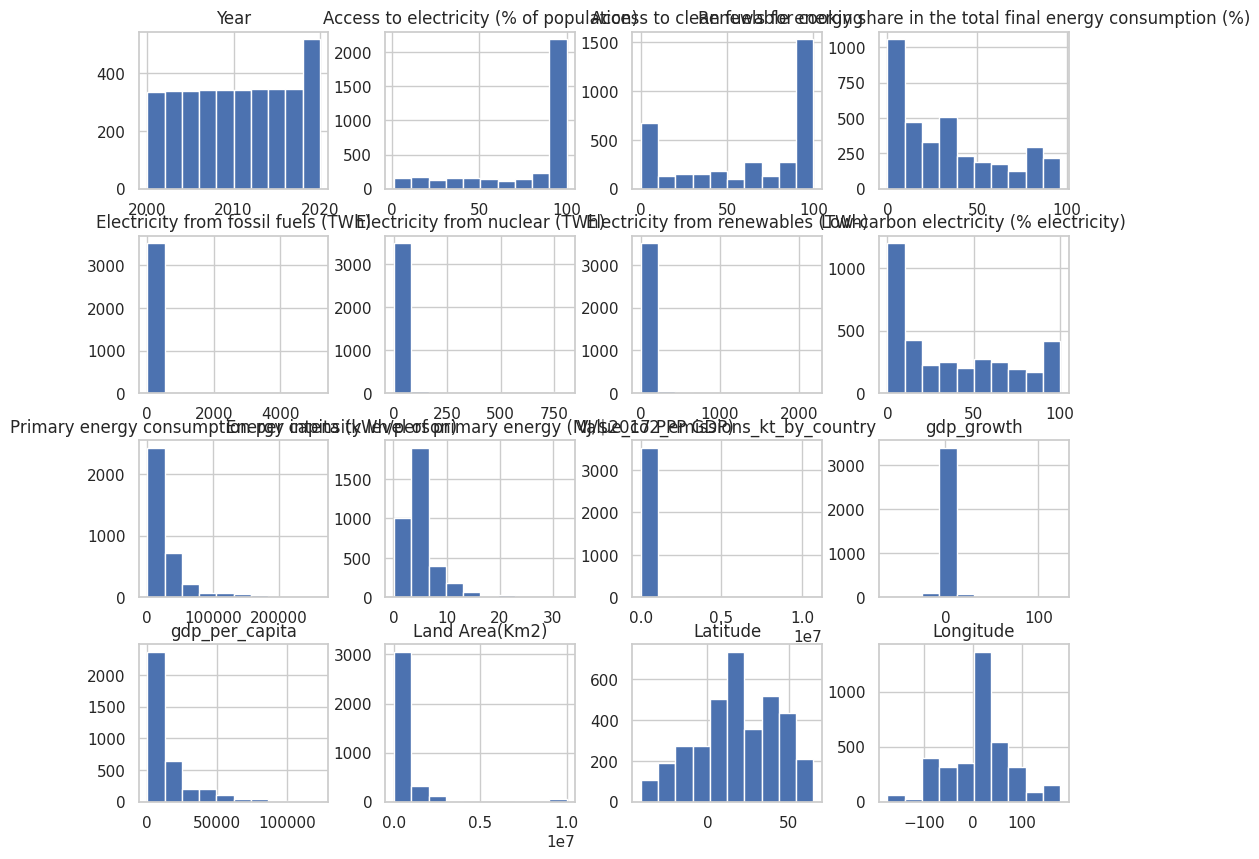

In [18]:
# Visualize histograms for each numerical column
df.hist(figsize=(12, 10))
plt.show()

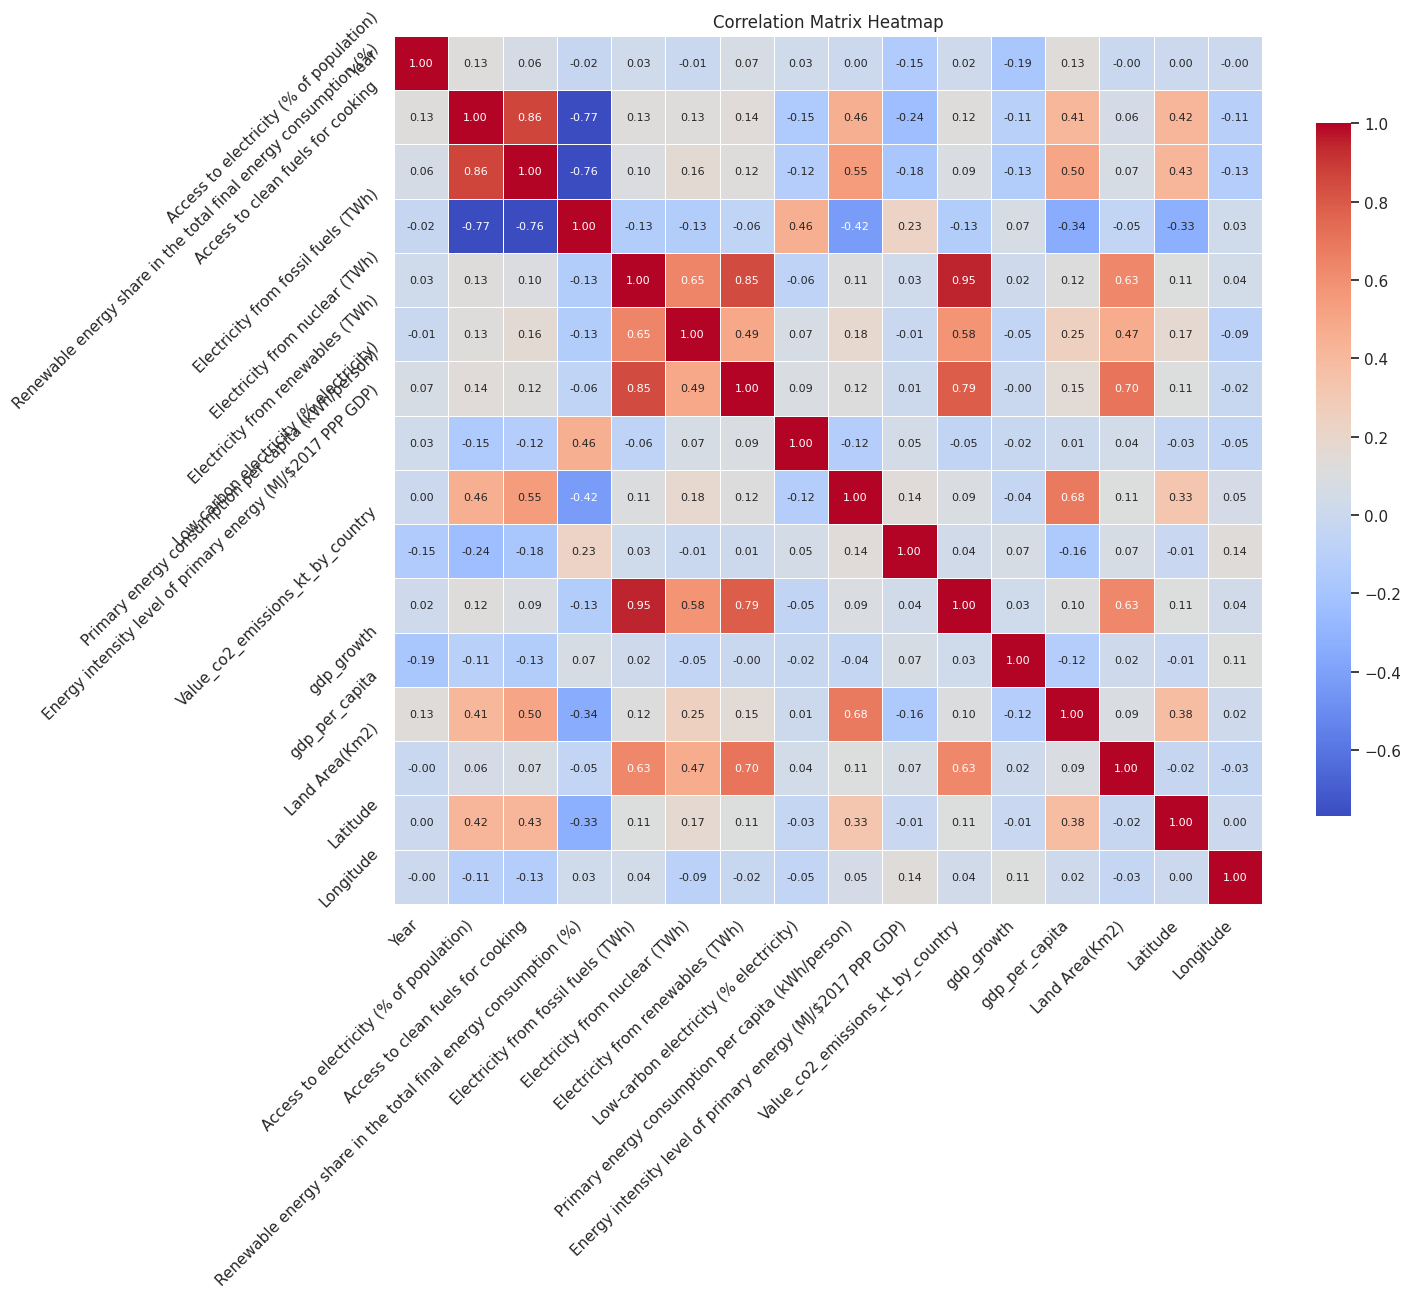

In [19]:
# Increase the figure size for a clearer heatmap
plt.figure(figsize=(14, 12))
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={"shrink": .75}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot_kws={"size": 8}, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
# Print the column names
print(df.columns)
grouped_data = df.groupby('Entity').mean()
grouped_data.head(10)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')


,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
Entity,,,,,,,,,,,,,,,,,
Afghanistan,2010.0,52.520488,19.802381,26.011817,0.189524,0.000000,0.740952,78.872636,697.268136,2.194635,11491.736342,5.774996,1662.362296,60.0,652230.0,33.939110,67.709953
Albania,2010.0,99.981429,63.592857,32.638165,0.048571,0.000000,5.184286,98.855430,11353.520929,3.278921,11710.783942,3.859305,3623.224775,105.0,28748.0,41.153332,20.168331
Algeria,2010.0,99.108146,98.904762,1.827532,46.895714,0.000000,0.365238,0.742125,12925.532952,4.537016,121823.164953,2.885714,3787.817377,18.0,2381741.0,28.033886,1.659626
Angola,2010.0,35.138564,44.933333,56.503722,2.040476,0.000000,4.420952,68.980548,3102.008457,3.011302,28269.355235,4.945895,2982.568601,26.0,1246700.0,-11.202692,17.873887
Antigua and Barbuda,2010.0,98.823761,100.000000,1.745151,0.271429,0.000000,0.002857,0.861557,32065.486190,3.704159,8101.260126,1.515946,13555.401528,223.0,443.0,17.060816,-61.796428
Argentina,2010.0,98.241525,98.469048,10.659436,76.309524,6.722857,33.811429,35.772016,20954.674810,3.583683,160433.642856,1.416468,9238.734894,17.0,2780400.0,-38.416097,-63.616672
Armenia,2010.0,99.498020,93.661905,9.699913,2.210476,2.220476,1.989524,66.202380,13100.438333,4.439874,12161.736324,5.909524,2886.863105,104.0,29743.0,40.069099,45.038189
Aruba,2010.0,99.286509,63.255287,4.872770,0.785238,0.000000,0.076667,8.519704,53159.792952,10.326064,32157.132131,1.320369,23789.982277,590.0,179.0,12.521110,-69.968330
Australia,2010.0,100.000000,100.000000,9.427055,201.980476,0.000000,28.881905,12.285539,68243.857762,5.234159,365267.925976,2.775869,45553.202580,3.0,7741220.0,-25.274398,133.775136


In [21]:
from sklearn.decomposition import PCA
numeric_cols = grouped_data.select_dtypes(include=['float64', 'int64']).columns
# print(grouped_data.columns)
df_test =grouped_data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_test[numeric_cols])


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_


cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Choose the number of components that explain 95% of the total variance
num_components = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1



pca2 = PCA(n_components=2)
df_pca = pca2.fit_transform(X_scaled)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')
For n_clusters = 2 The average silhouette_score is : 0.851061419571433
For n_clusters = 3 The average silhouette_score is : 0.5924257389113222
For n_clusters = 4 The average silhouette_score is : 0.46287899568169
For n_clusters = 5 The average silhouette_score is : 0.48404691755304613
For n_clusters = 6 The average silhouette_score is : 0.49557551

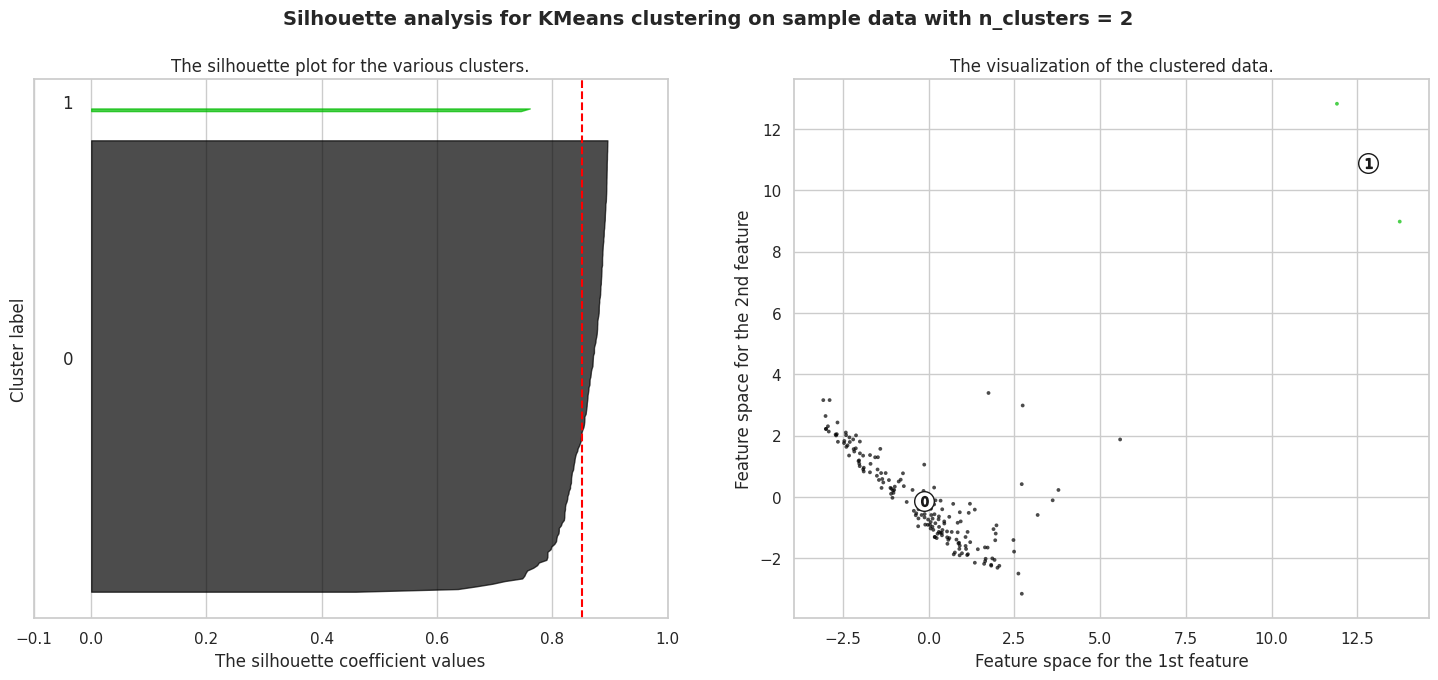

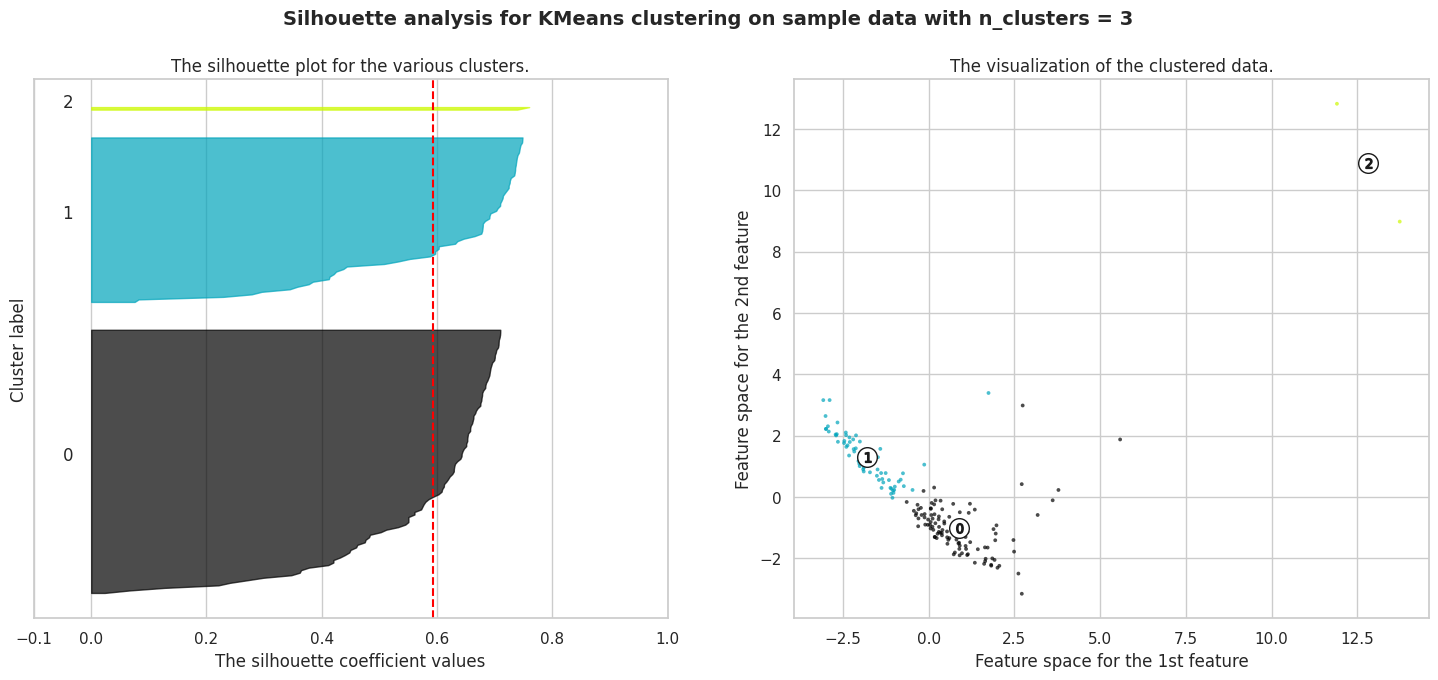

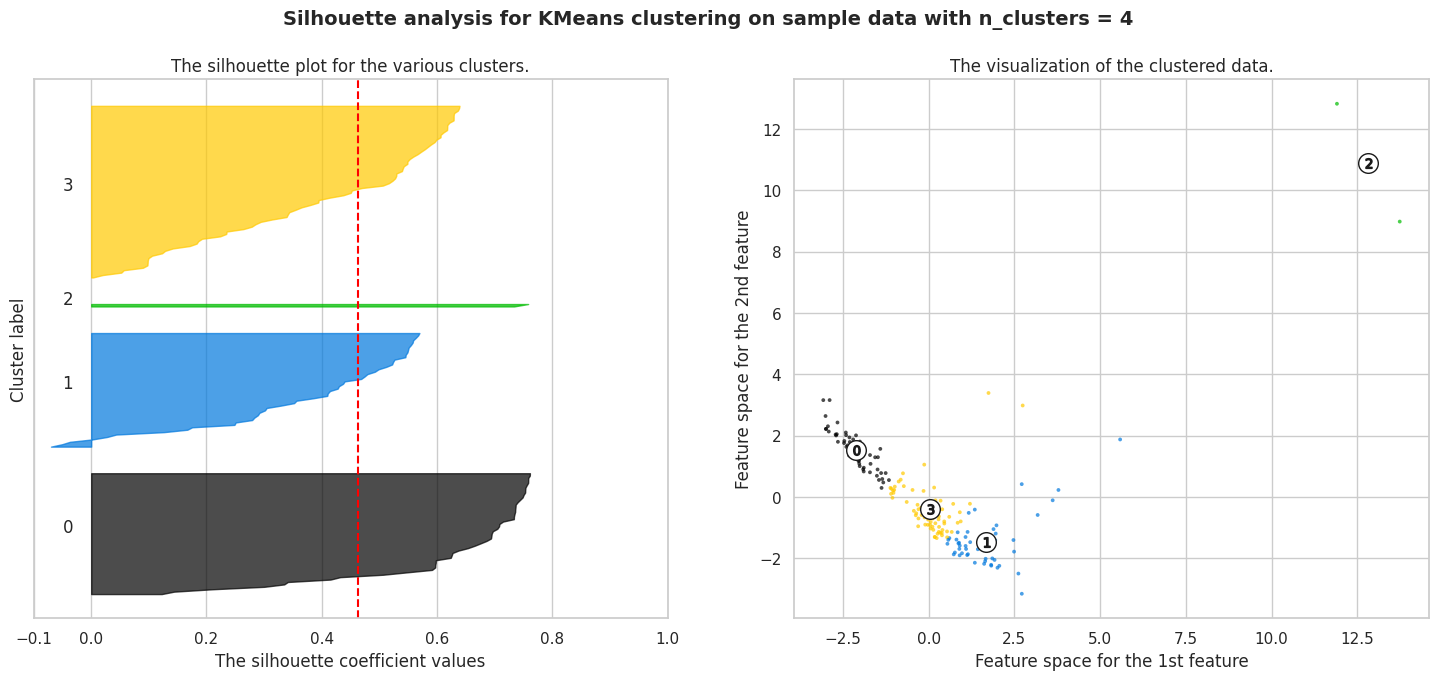

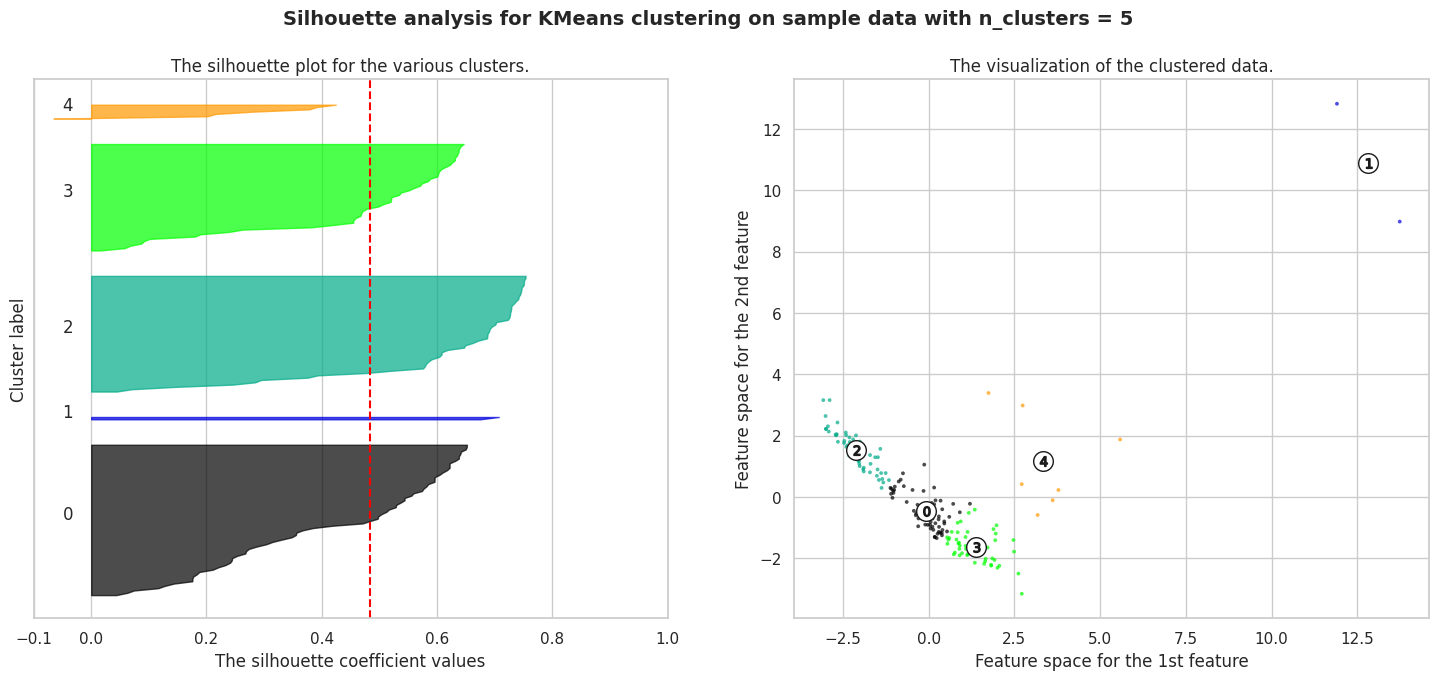

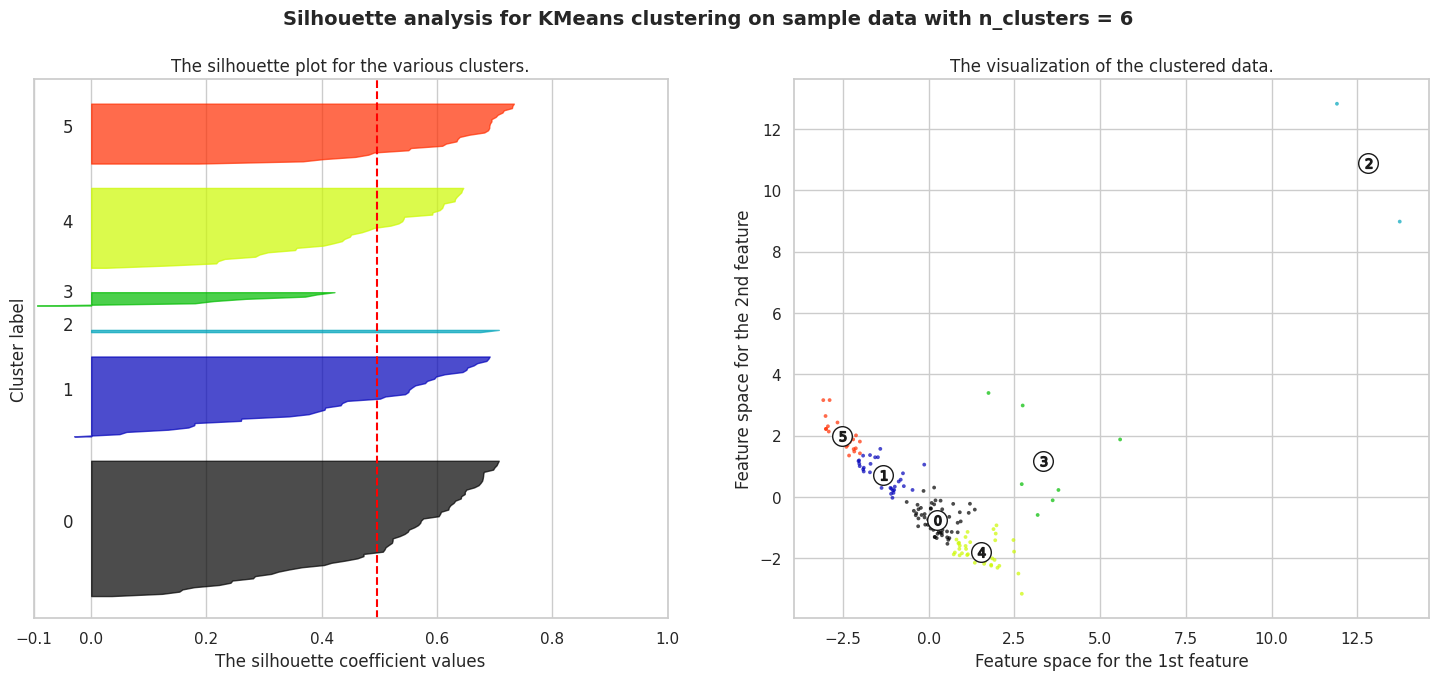

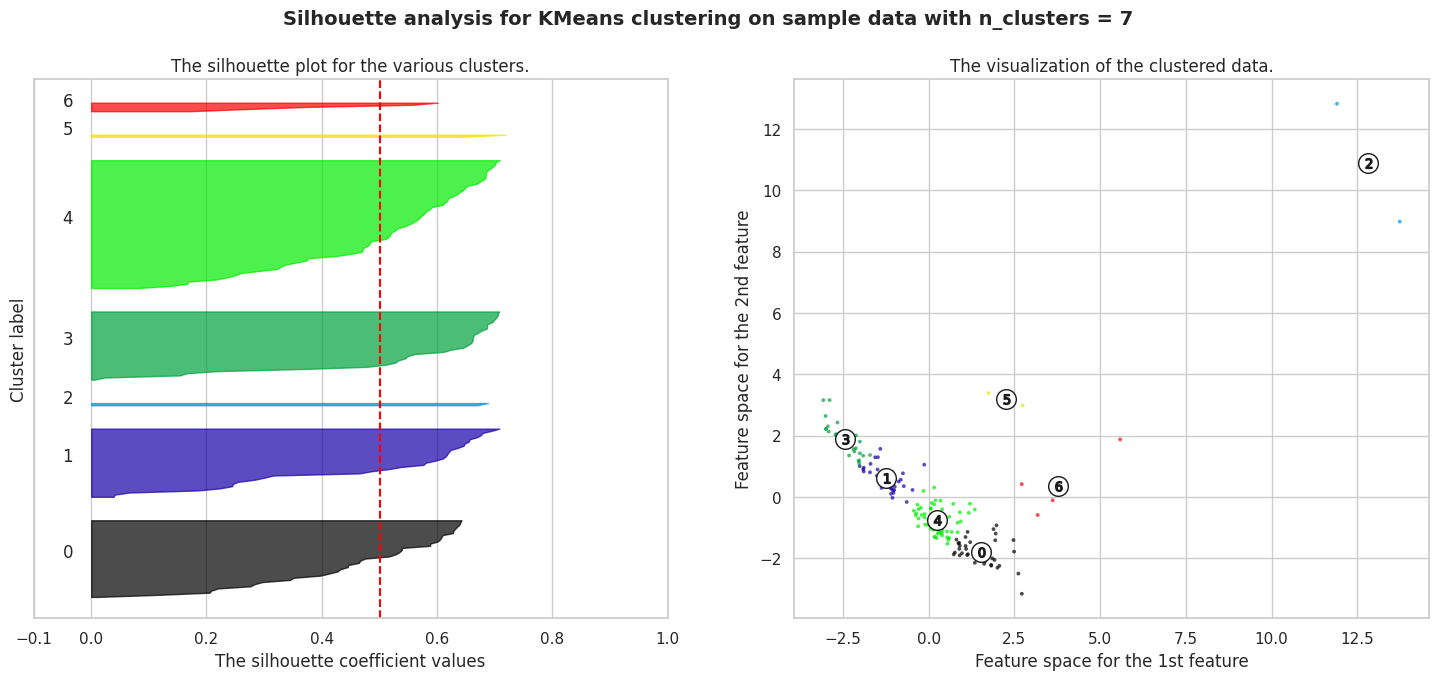

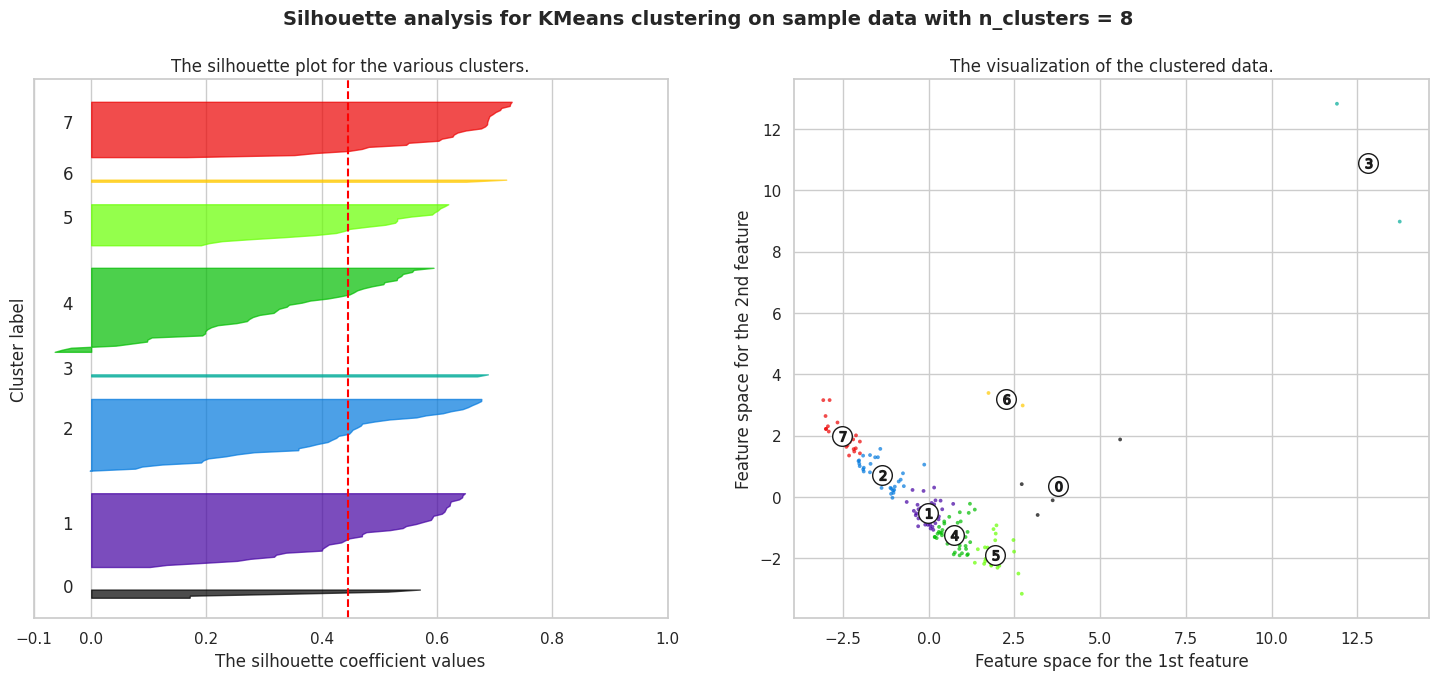

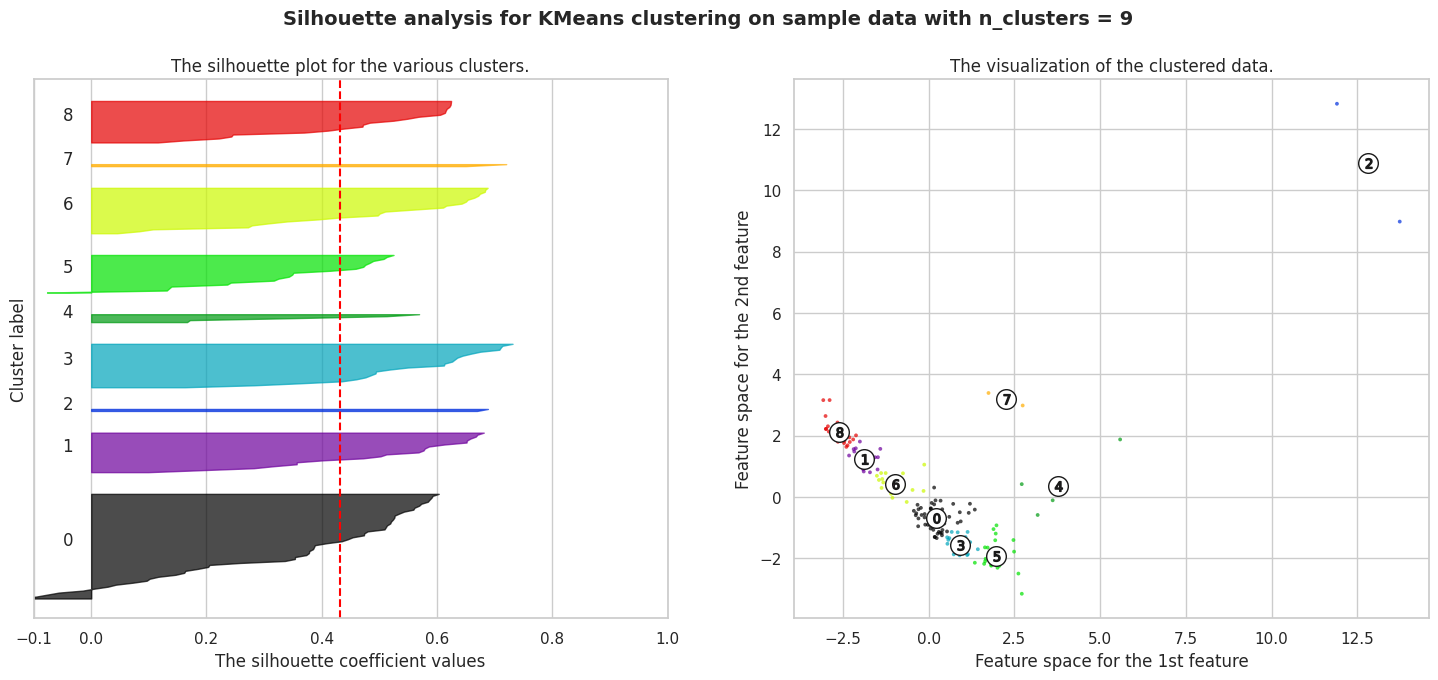

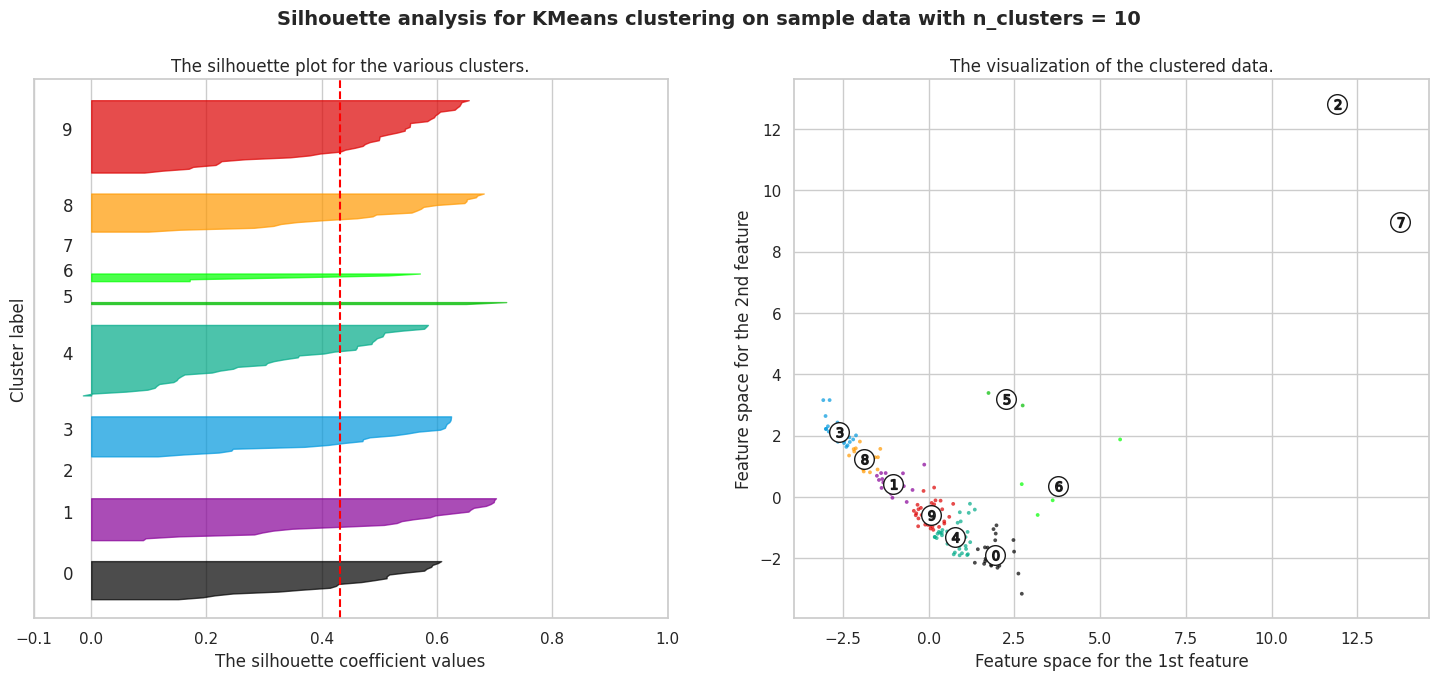

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
# Assuming 'Entity' is a categorical variable
# df = pd.get_dummies(df, columns=['Entity'], drop_first=True)
print(df.columns)

# Define the range of clusters to evaluate
n_clusters_range = range(2, 11)

# Store the country names in a list
country_names = df['Entity'].unique()

for n_clusters in n_clusters_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(df_pca)
    
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



In [23]:
n_clusters = 3


kmeans = KMeans(n_clusters=n_clusters, random_state=10)
clusters_labels = kmeans.fit_predict(df_pca)

# Store the country names in a list
country_names = df['Entity'].unique()

# Create a dictionary with the country names as keys and cluster labels as values
countrys_cluster_dict = dict(zip(country_names, clusters_labels))


# Print the sorted dictionary
for country, label in countrys_cluster_dict.items():
    print(f"Country: {country}, Cluster: {label}")

Country: Afghanistan, Cluster: 1
Country: Albania, Cluster: 0
Country: Algeria, Cluster: 0
Country: Angola, Cluster: 1
Country: Antigua and Barbuda, Cluster: 0
Country: Argentina, Cluster: 0
Country: Armenia, Cluster: 0
Country: Aruba, Cluster: 0
Country: Australia, Cluster: 0
Country: Austria, Cluster: 0
Country: Azerbaijan, Cluster: 0
Country: Bahamas, Cluster: 0
Country: Bahrain, Cluster: 0
Country: Bangladesh, Cluster: 1
Country: Barbados, Cluster: 0
Country: Belarus, Cluster: 0
Country: Belgium, Cluster: 0
Country: Belize, Cluster: 0
Country: Benin, Cluster: 1
Country: Bhutan, Cluster: 1
Country: Bosnia and Herzegovina, Cluster: 0
Country: Botswana, Cluster: 1
Country: Brazil, Cluster: 0
Country: Bulgaria, Cluster: 0
Country: Burkina Faso, Cluster: 1
Country: Burundi, Cluster: 1
Country: Cambodia, Cluster: 1
Country: Cameroon, Cluster: 1
Country: Canada, Cluster: 0
Country: Cayman Islands, Cluster: 0
Country: Central African Republic, Cluster: 1
Country: Chad, Cluster: 1
Country: 